In [1]:
import pandas as pd

# Loading the dataset
train_df = pd.read_csv("train.csv") # Loading the train.csv
test_df = pd.read_csv("test.csv") # Loading the test.csv

In [2]:
# Checking if the dataset loaded correctly:
train_df.head() # This will display the first 5 rows from the dataframe made from the dataset train.csv

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis (EDA):

### We will now explore the dataset to identify the following:-

- Missing Values
- Summary Statistics
- Feature Types (Numerical Vs. Categorical)
- Correlation between features
- Data distributions

In [4]:
train_df.info()
# This will display the information about the following of the dataset:-
# - Variables
# - Number of columns
# - Data types (int, float, object)
# - Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Number of variables:
- There are **81 columns/variables/features** and **1460 rows** in the dataset
### Missing Values:
- Some features are **numerical (int/float)**, while others are **categorical (object)**.
- Variables like LotFrontage, Alley, PoolQC, Fence, MiscFeature etc., have missing values
### Data Types:
- We have int, object and float as data types present in the dataset.

## Checking for Missing Values Explicitly

In [7]:
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0] # missing_values > 0  to show only the columns which have missing values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
print("Number of columns having missing values: >>> ",missing_values[missing_values > 0].count())
print("Total Number of missing values in the entire dataset: >>> ",missing_values.sum())

Number of columns having missing values: >>>  19
Total Number of missing values in the entire dataset: >>>  7829


### What did we observe here?
- Several features have missing values.
- **High missing values:** `Alley`, `PoolQC`, `MiscFeature` (over 90% missing).
- **Moderate missing values:** `LotFrontage`, `FireplaceQu`, `GarageYrBlt`.
- We may need to decide whether to **fill (impute) or drop** these features.

## Summary Statistics (Numerical Features)

### This will help us observe the following:-
- Mean, Min, Max, Standard Deviation e.t.c.
- Percentiles (like 25%, 50%, 75%): This can be used to have an idea about where the quartiles could lie.
- Feature distributions.

In [11]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- The `SalePrice` (target variable) has an **average price of $180,921.196**.
- Some numerical features have **high standard deviation**, indicating **skewness**.
- Features like `LotFrontage`, `MasVnrArea`, `GarageYrBlt` have **missing values**.

### Counting Unique Value for Categorical Features:

Few features in the dataset are categorical (e.g. MSZoning, Street, Neighbourhood)

In [14]:
train_df.select_dtypes(include = ['object']).nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

#### The above gave us the number of unique values in each feature/variable/column of the dataset.

## Identifying the Numerical & categorical columns Separately:

In [17]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features: ", len(categorical_cols), "\n", categorical_cols)
print("Numerical Features: ", len(numerical_cols), "\n", numerical_cols)

Categorical Features:  43 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Features:  38 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalf

- **Numerical Features:** 38
- **Categorical Features:** 43
- We will need to handle categorical features using **encoding techniques** before applying ML models.

### Now we could have gone for handling the data directly, (though its not a wrong approach and depends more on the goal of analysis and visualization) but here we will visualize the trends first and then decide how to proceed with handeling the data.

# Data Visualization
### What we are going to visualize?
- Distribution of the target variable: **SalePrice**
- Missing Values in the Heatmap
- Correlation Heatmap
- Feature Distribution (Histograms & Boxplots)
- Relation Between Key Features & **SalePrice**

### Distribution Plot of **SalesPrice**

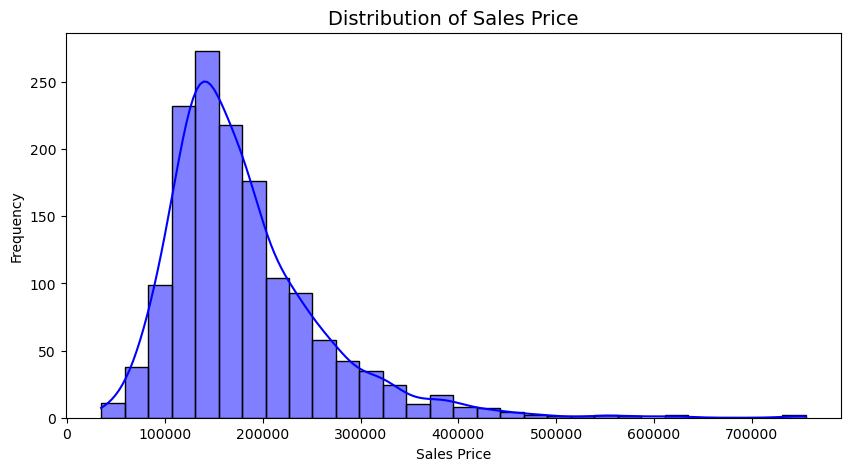

In [22]:
import matplotlib.pyplot as plt # This library/package is going to help us visualize the data
import seaborn as sns # A python package for visualization that is built on top of matplotlib. Can be used for Statistical Visualization.

# Setting figure size:
plt.figure(figsize = (10,5))

# Histogram Plot:
sns.histplot(train_df['SalePrice'], kde=True, bins=30, color='blue')

# Titles: Plot Title, x-label, y-label
plt.title('Distribution of Sales Price', fontsize=14) # This gives the title to the plot
plt.xlabel('Sales Price') # This labels the X-Axis
plt.ylabel('Frequency') # This labels the Y-Axis

plt.show() # This sets the plot on the show (To display the plot)


- The distribution of **SalePrice** looks right skewed.
- Distribution shows that most prices are between **$100,000** and **$250,000**.
- There are few **very high-priced houses**, which might prove to be outliers.
- A **log transformation** might help normalize the distribution.

## Visualizing Missing Values (Heatmap)

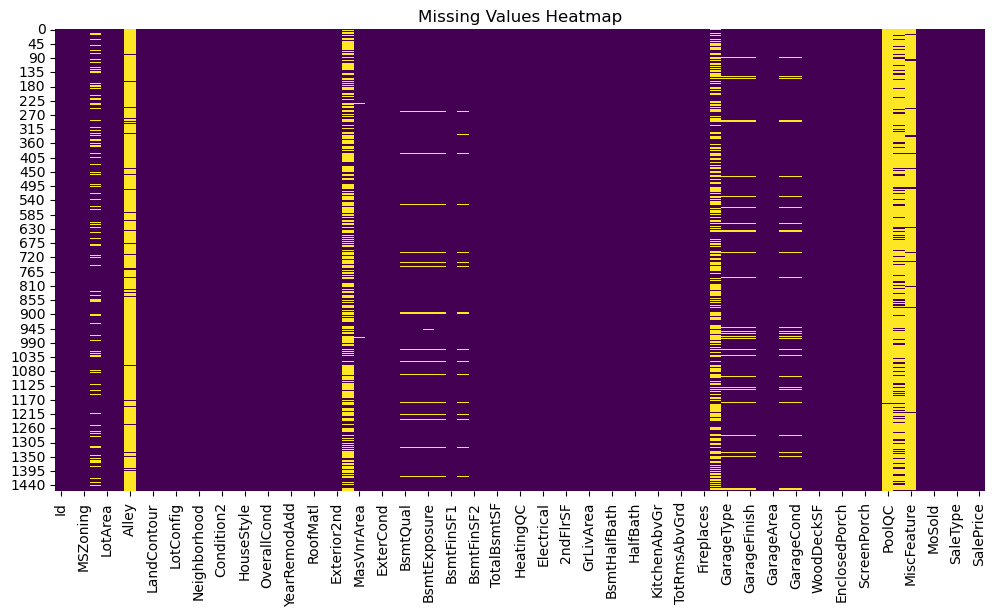

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

- The Yellow color shows the missing values.
- There are **High missing values** in:
  - 'Alley', 'PoolQC', 'Fence', 'MiscFeatures' -> Over 80% missing!
  - These might be candidates for **removal** if not useful.
- ** Moderate Missing Values**:
  - 'LotFrontage', 'FireplaceQu', 'GarageYrBlt', 'BsmtQual'.
  - These could be **imputed (filled)** using mean/median/mode.

### We need to analyze which features are important before deciding how to handle missing values.

## Feature Correlation Heatmap

#### We will check on how features relate to **SalePrice**.

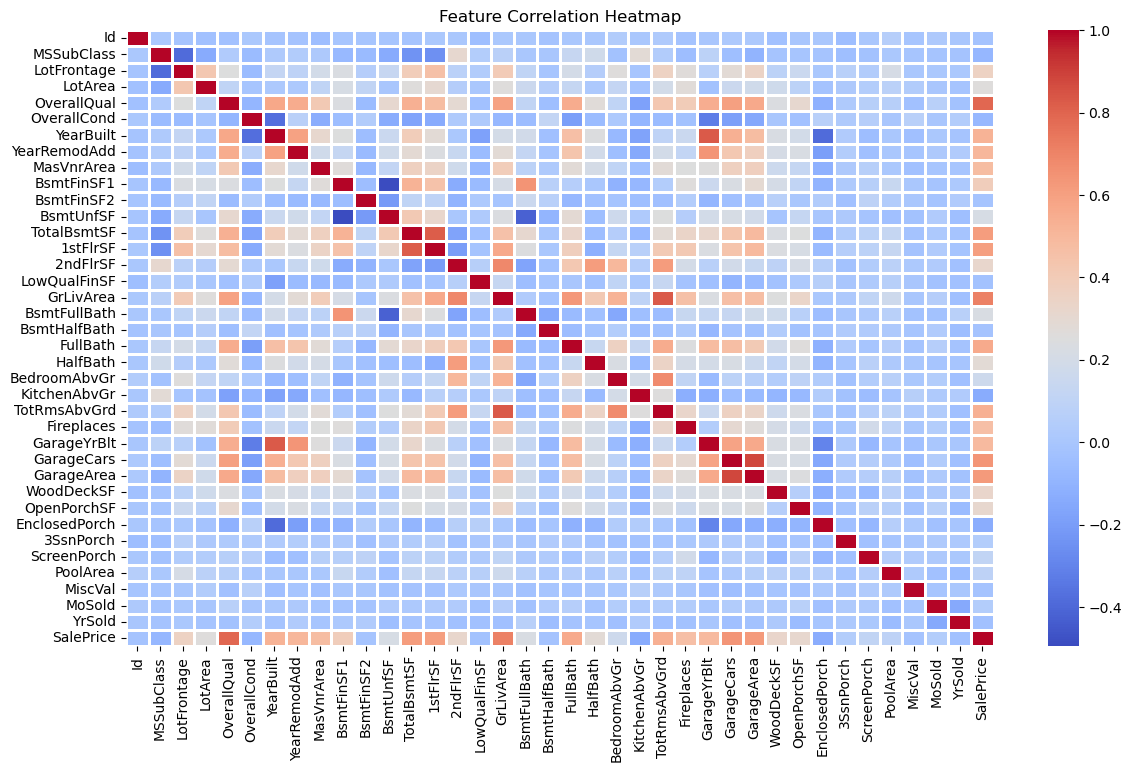

In [28]:
plt.figure(figsize=(14, 8))

# Compute correlation only on numerical features
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=1)

plt.title('Feature Correlation Heatmap')
plt.show()

- `SalePrice` has **strong positive correlation** with:
  - 'OverallQual' (Quality of house)
  - 'GrLivArea' (Above ground living area)
  - 'GarageCars' (Number of garage cars)
  - `TotalBsmtSF' (Total basement square footage)
- Some features are **highly correlated with each other**:
  - 'GarageArea' and `GarageCars`
  - 'TotalBsmtSF' and `1stFlrSF`
  - 'YearBuilt' and `YearRemodAdd`
- **High correlation between features** means we might need to **remove redundant columns** to prevent multicollinearity.

## Visualizing Feature Distribution
#### We will check important numerical features against **SalePrice**.

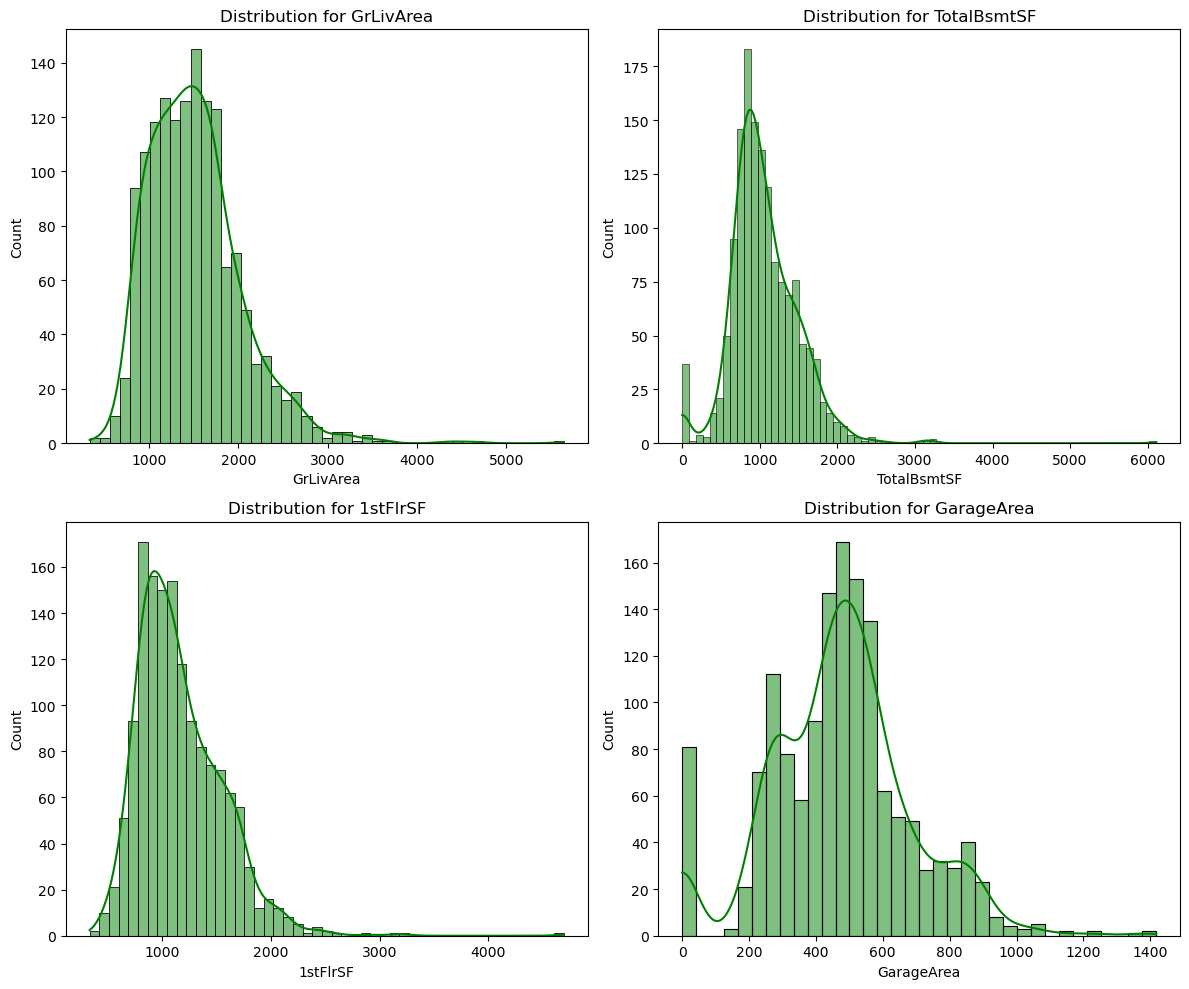

In [31]:
# Selecting key numerical features against SalesPrice.
features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

# Plotting Histogram
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(train_df[col], kde=True, ax = axes[i], color='green')
    axes[i].set_title(f"Distribution for {col}")

plt.tight_layout()
plt.show()

- **All four features (`GrLivArea`, `TotalBsmtSF`, `1stFlrSF`, `GarageArea`) show a right-skewed distribution.**
- Most houses have:
  - `GrLivArea` between **1000-2000 sq ft**.
  - `TotalBsmtSF` between **800-1500 sq ft**.
  - `GarageArea` mostly **under 800 sq ft**.
- **Outliers detected:**
  - A few houses have **extremely large living areas** (>4000 sq ft).
  - Some houses have **zero basement or garage area**, which might indicate missing data or specific house types.
- **Possible Next Steps:**
  - Consider applying **log transformation** to normalize skewed data.
  - Investigate outliers and decide whether to **remove or keep them**.

## Relationship Between Key Features & **SalePrice**
#### Here, we will check how size (**GrLivArea**) affects the price.

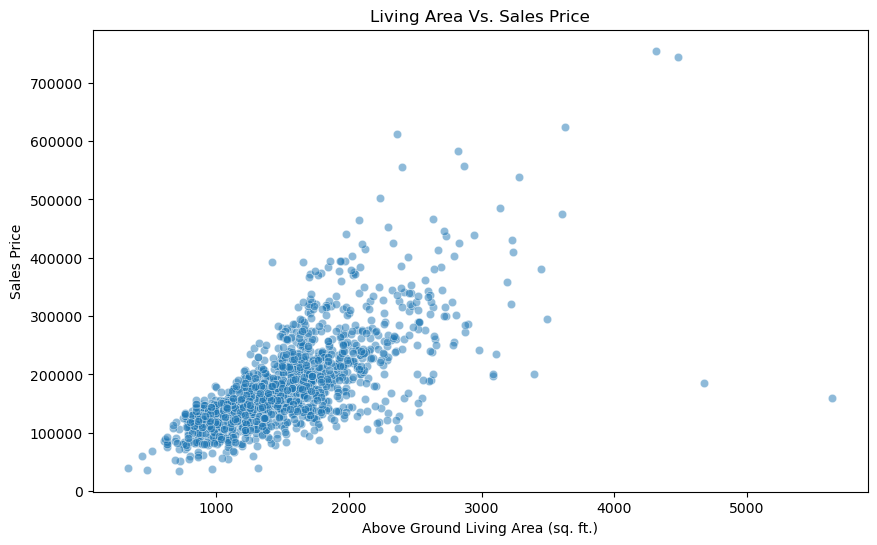

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = train_df['GrLivArea'], y=train_df['SalePrice'], alpha=0.5)

plt.title("Living Area Vs. Sales Price")
plt.xlabel("Above Ground Living Area (sq. ft.)")
plt.ylabel("Sales Price")

plt.show()